In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import datetime as dt
import seaborn as sns




notebook_path = os.path.abspath("DataAnalyticsKickstarterNotebook_Cedrik.ipynb")
csv_path_features = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-klassifikation-features.csv")
csv_path_trueLabels = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-klassifikation-target.csv")

In [2]:
df_features = pd.read_csv (csv_path_features, low_memory=False)
df_target = pd.read_csv (csv_path_trueLabels, low_memory=False)

In [3]:
df_features['target'] = df_target['successful']
df_features

,usd_goal_real,duration,name_length,creator_type,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,target
0,1.981553e-05,0.208791,0.221053,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,3.302593e-05,0.153846,0.336842,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3.302534e-06,0.142857,0.368421,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3.301939e-07,0.076923,0.157895,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1.321033e-05,0.879121,0.473684,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129575,5.573435e-05,0.318681,0.557895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
129576,1.831556e-03,0.296703,0.263158,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129577,3.302593e-05,0.461538,0.589474,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
129578,1.708825e-05,0.318681,0.147368,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

from sklearn.model_selection import train_test_split

In [5]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
kickstarter_basic = ols("target ~ usd_goal_real + duration + name_length + creator_type + Art + Comics + Crafts + Dance + Design  + Fashion + Food + Games + Journalism + Music + Photography + Publishing + Technology + Theater ", df_features).fit()

print(kickstarter_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     860.6
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:23:02   Log-Likelihood:                -86588.
No. Observations:              129580   AIC:                         1.732e+05
Df Residuals:                  129561   BIC:                         1.734e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6444      0.005    117.274

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_features.iloc[: ,0:19], df_features.iloc[: , -1], random_state=42)

In [7]:
X_train.iloc[2:10]

,usd_goal_real,duration,name_length,creator_type,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
81209,0.000066,0.318681,0.168421,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49337,0.000066,0.318681,0.242105,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
945,0.000009,0.318681,0.273684,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49550,0.000014,0.208791,0.526316,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11599,0.000051,0.318681,0.221053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85164,0.000003,0.318681,0.347368,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104683,0.000030,0.318681,0.178947,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
97976,0.000991,0.318681,0.347368,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test.iloc[1:10])
expected = y_test.iloc[1:10]

In [9]:
y_test.iloc[1:10]

53484     0
14825     1
68417     0
98824     0
26252     1
66898     1
65120     0
121516    1
58191     1
Name: target, dtype: int64

In [10]:
predicted

array([0.51904297, 0.58432007, 0.33709717, 0.34124756, 0.33026123,
       0.63790894, 0.24838257, 0.2828064 , 0.48880005])

In [11]:
predicted

array([0.51904297, 0.58432007, 0.33709717, 0.34124756, 0.33026123,
       0.63790894, 0.24838257, 0.2828064 , 0.48880005])

In [12]:
expected

53484     0
14825     1
68417     0
98824     0
26252     1
66898     1
65120     0
121516    1
58191     1
Name: target, dtype: int64

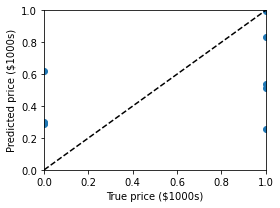

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test.iloc[1:10])
expected = y_test.iloc[1:10]

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

# Einfügen von Feature usd_pledged für regression, da dieses Attribut mehr Sinn macht

In [14]:
notebook_path = os.path.abspath("DataAnalyticsKickstarterNotebook_Cedrik.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-merged.csv")
csv_path_oneProject = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-oneProject.csv")
csv_path_multipleProjects = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-multipleProjects.csv")

In [15]:
df = pd.read_csv (csv_path, low_memory=False)
df_oneProject = pd.read_csv (csv_path_oneProject, low_memory=False)
df_multipleProjects = pd.read_csv (csv_path_multipleProjects, low_memory=False)

df["name_length"] = df["name"].str.len()

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,creator_id,name_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.00,1533.95,59,753774991,31
1,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.00,50000.00,35,362504450,20
2,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.00,25000.00,45,1295394884,49
3,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.0,12700.00,12500.00,30,1116977628,16
4,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,2017-08-08 01:20:20,1.0,failed,1,AU,0.0,0.81,2026.10,30,1942626789,32


In [16]:
df["creator_type"] = 3
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,creator_id,name_length,creator_type
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.00,1533.95,59,753774991,31,3
1,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.00,50000.00,35,362504450,20,3
2,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.00,25000.00,45,1295394884,49,3
3,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.0,12700.00,12500.00,30,1116977628,16,3
4,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,2017-08-08 01:20:20,1.0,failed,1,AU,0.0,0.81,2026.10,30,1942626789,32,3


In [17]:
for key, row in df_oneProject.iterrows():
        creator_index = df.index[df['creator_id'] == row["creator_id"]].tolist()
        df.at[creator_index[0],'creator_type']= 0

In [18]:
df = df.sort_values(by=["creator_id","launched"])

In [19]:
for key, row in df_multipleProjects.iterrows():
        firstProject = df[df["creator_id"] == row["creator_id"]].iloc[0]
        creator_index = df.index[df['creator_id'] == row["creator_id"]].tolist()
        
        if (firstProject["state"] == "successful"):
            for i in range(len(creator_index)):
                df.at[creator_index[i],'creator_type']= 1
        else:
            for i in range(len(creator_index)):
                df.at[creator_index[i],'creator_type']= 2

In [20]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,creator_id,name_length,creator_type
100166,558744194,Feltron vs Kickstarter,Graphic Design,Design,USD,2009-10-14,3000.0,2009-09-24 07:33:14,3222.00,successful,132,US,3222.00,3222.00,3000.0,20,3,22,1
23118,134175247,Center for Lost Arts – a document,Public Art,Art,USD,2015-07-01,5000.0,2015-06-16 22:02:59,11486.00,successful,190,US,11486.00,11486.00,5000.0,15,3,33,1
39115,1577455391,This is also not a Kickstarter shirt,Apparel,Fashion,USD,2014-05-29,500.0,2014-05-15 00:17:37,16167.71,successful,604,US,16167.71,16167.71,500.0,14,8,36,1
48686,171893227,Invisible Courts,Zines,Publishing,USD,2017-01-12,50.0,2017-01-04 19:28:57,207.66,successful,104,US,113.00,207.66,50.0,8,8,16,1
96300,499552311,Kind of Bloop: An 8-Bit Tribute to Miles Davis,Jazz,Music,USD,2009-08-01,2000.0,2009-05-12 20:50:44,8647.79,successful,419,US,8647.79,8647.79,2000.0,81,9,46,1


In [21]:
list_features = ["usd_pledged_real","usd_goal_real","duration","name_length", "creator_type", "main_category"]
df_features = df[list_features].copy()
df_state = df[["ID","state"]].copy()

In [22]:
df_features = pd.concat([df_features.drop('main_category', axis=1), pd.get_dummies(df_features['main_category'])], axis=1)
true_labels = pd.concat([df_state.drop('state', axis=1), pd.get_dummies(df_state['state'])], axis=1)
true_labels.drop(columns=["failed","canceled","live"], inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
list_scaler = ["usd_goal_real","usd_pledged_real","duration","name_length"]
for feature in list_scaler:
    scaler.fit(df_features[[feature]])
    df_features[feature] = scaler.fit_transform(df_features[[feature]])

In [24]:
df_features.head()

,usd_pledged_real,usd_goal_real,duration,name_length,creator_type,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
100166,0.000375,1.981553e-05,0.208791,0.221053,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23118,0.001336,3.302593e-05,0.153846,0.336842,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39115,0.001881,3.302534e-06,0.142857,0.368421,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48686,0.000024,3.301939e-07,0.076923,0.157895,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
96300,0.001006,1.321033e-05,0.879121,0.473684,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
df_features['target'] = df_target['successful']
df_features

,usd_pledged_real,usd_goal_real,duration,name_length,creator_type,Art,Comics,Crafts,Dance,Design,...,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,target
100166,0.000375,1.981553e-05,0.208791,0.221053,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
23118,0.001336,3.302593e-05,0.153846,0.336842,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39115,0.001881,3.302534e-06,0.142857,0.368421,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48686,0.000024,3.301939e-07,0.076923,0.157895,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96300,0.001006,1.321033e-05,0.879121,0.473684,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68077,0.001832,5.573435e-05,0.318681,0.557895,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14355,0.000000,1.831556e-03,0.296703,0.263158,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8326,0.000023,3.302593e-05,0.461538,0.589474,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23524,0.000512,1.708825e-05,0.318681,0.147368,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
pledged_basic = ols("usd_pledged_real ~ usd_goal_real + duration + name_length + creator_type + Art + Comics + Crafts + Dance + Design  + Fashion + Food + Games + Journalism + Music + Photography + Publishing + Technology + Theater + target ", df_features).fit()

print(kickstarter_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     860.6
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:23:59   Log-Likelihood:                -86588.
No. Observations:              129580   AIC:                         1.732e+05
Df Residuals:                  129561   BIC:                         1.734e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6444      0.005    117.274

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_features.iloc[: ,1:20], df_features.iloc[: , 0], random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
clf_Linear = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

# Evaluation der Modellvorhersagen

In [29]:
#RMSE der Modellvorhersagen
from sklearn.metrics import mean_squared_error
mean_squared_erroruared_error(expected, predicted)

6.179584045873151e-05

In [30]:
#erklärte Varianz im Modell
from sklearn.metrics import explained_variance_score
explained_variance_score(expected,predicted) 

0.10200710749645892

In [42]:
# Mittelwertsvorhersage: Vorhersage ist ein Array in Länge der Testdaten, der an jeder Position den
# Mittelwert der Zieldaten aus dem Trainingsset enthält

train_predict_mean = np.full(len(y_test),y_train.mean())

print("RMSE der Mittelwertsbaseline: ", mean_squared_error(y_test, train_predict_mean))

RMSE der Mittelwertsbaseline:  6.881564074643319e-05


# Ergebnis für Lineare Regression: 
die Modellvorhersage hat ein Baseline von 
6.179584045873151e-05, wobei die Baseline ein RSME von:
6.881564074643319e-05 hat. Daher ist das Modell minimal besser.

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

clf_Boost = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted_boost = clf.predict(X_test)
expected_boost = y_test



In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(expected_boost, predicted_boost)

6.693011459418307e-05

In [48]:
from sklearn.metrics import explained_variance_score
explained_variance_score(expected_boost,predicted_boost)

0.027403002412580757

# Ergebnis für GradientBoosting Regressor 

In [49]:
# Mittelwertsvorhersage: Vorhersage ist ein Array in Länge der Testdaten, der an jeder Position den
# Mittelwert der Zieldaten aus dem Trainingsset enthält

train_predict_mean_boost = np.full(len(y_test),y_train.mean())

print("RMSE der Mittelwertsbaseline: ", mean_squared_error(y_test, train_predict_mean_boost))

RMSE der Mittelwertsbaseline:  6.881564074643319e-05


# Ergebnis für GradientBoostRegressor: 
die Modellvorhersage mit GradientBoostingRegressor hat ein Baseline von 
6.693011459418307e-05, wobei die Baseline ein RSME von:
6.881564074643319e-05 hat. Daher ist das Modell minimal besser.

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
ax = plt.gca()
ax.set_xlim([0,0.01])
ax.set_ylim([0,0.01])
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()